In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import math
import cv2

In [2]:
img = cv2.imread("./fracture/training/236.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
images=[img,gray]

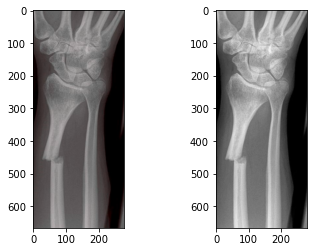

In [3]:
for i in range(2):
    plt.subplot(1,2,i+1),
    plt.imshow(images[i],'gray')
    
plt.show()

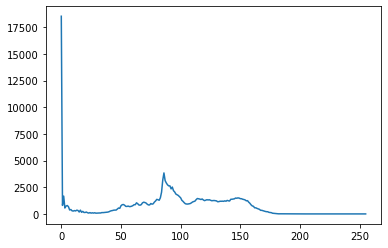

In [4]:
# Calculating histogram of the image
hist = cv2.calcHist([img],[0], None,[256],[0,255])
plt.plot(hist)
plt.show()

In [5]:
# Sobel method
gradient_sobel_x = cv2.Sobel(img,-1,1,0)
# it works vertically
gradient_sobel_y = cv2.Sobel(img,-1,0,1)
# it works horizontally
gradient_sobel_xy = cv2.addWeighted(gradient_sobel_x,0.5,gradient_sobel_y,0.5,0)
# combination of x and y

In [6]:
# Laplacian method
gradient_laplacian = cv2.Laplacian(img,-1)

In [7]:
# Canny Edge Detection
# 80 is min threshold pixel below this will be black or ignore
# 150 is max threshold value pixel above it will be untouched
# pixel between this range are handle using hysteresis
canny_output = cv2.Canny(img,80,150)

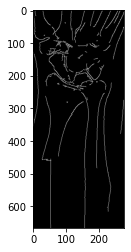

In [8]:
# cv2.imshow('Sobel X',gradient_sobel_x)
# cv2.imshow('Sobel Y',gradient_sobel_y)
# cv2.imshow('Sobel X+Y',gradient_sobel_xy)
# cv2.imshow('Laplacian',gradient_laplacian)
cv2.imshow('Canny',canny_output)
cv2.waitKey()

In [57]:
lines = cv2.HoughLines(canny_output, 1, np.pi / 180, 150)
# lines = cv2.HoughLinesP(canny, 1, np.pi / 180, 100,minLineLength=100,maxLineGap=10)
print(lines)

[[[ 5.2000000e+01  0.0000000e+00]]

 [[-4.6000000e+01  3.1241393e+00]]

 [[ 5.6000000e+01  1.7453292e-02]]

 [[-4.3000000e+01  3.1241393e+00]]

 [[ 6.2000000e+01  1.7453292e-02]]

 [[ 5.9000000e+01  1.7453292e-02]]

 [[-4.9000000e+01  3.1241393e+00]]

 [[-5.1000000e+01  3.1241393e+00]]]


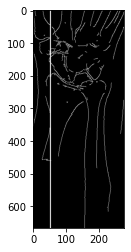

In [10]:
# Houghlines

if lines is not None:
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(canny_output, (x1,y1), (x2,y2), (255,255,255), 2)
#             pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
#             pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

plt.imshow(canny_output,'gray')
k = cv2.waitKey(0)

# plt.show()

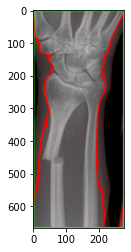

In [20]:
lower=np.array([120,120,120])
higher=np.array([250,250,250])
plt.imshow(images[0],'gray')

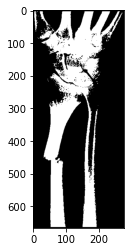

In [21]:
mask=cv2.inRange(img,lower,higher)
plt.imshow(mask,"gray")

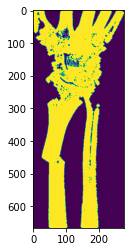

In [25]:
cont,_=cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cont_img=cv2.drawContours(mask,cont,-1,255,3)
plt.imshow(cont_img)

In [40]:
c=max(cont,key=cv2.contourArea)

In [41]:
x,y,w,h=cv2.boundingRect(c)

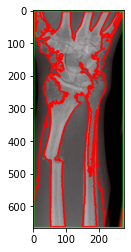

In [42]:
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
plt.imshow(img)